In [12]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df  = pd.read_csv('clean_horror.csv')
df

,ID,Title,Release Date,Popularity,Vote Average,Vote Count,Budget,Revenue,Runtime,Genres,Original Language,Production Companies,Production Countries,Overview,Tagline,Status,Director
0,17,The Dark,2005-09-28,9.063,5.768,263,0,6593579,87,"Horror, Thriller, Mystery",en,"Constantin Film, Impact Pictures, Isle of Man ...","Germany, United Kingdom","In an attempt to pull her family together, Adè...",One of the living for one of the dead.,Released,John Fawcett
1,83,Open Water,2003-10-26,11.331,5.530,1038,130000,54700000,79,"Drama, Thriller, Horror",en,"Plunge Pictures LLC, Lions Gate Films",United States of America,Two divers are left out at sea without a boat....,Scream all you want.,Released,Chris Kentis
2,170,28 Days Later,2002-10-31,45.982,7.227,6608,8000000,85700000,113,"Horror, Thriller, Science Fiction",en,DNA Films,United Kingdom,Twenty-eight days after a killer virus was acc...,His fear began when he woke up alone. His terr...,Released,Danny Boyle
3,176,Saw,2004-10-01,50.057,7.420,9087,1200000,103911669,103,"Horror, Mystery, Crime",en,"Twisted Pictures, Evolution Entertainment, Saw...",United States of America,Two men wake up to find themselves shackled in...,How much blood would you shed to stay alive?,Released,James Wan
4,214,Saw III,2006-10-26,49.447,6.403,4441,10000000,164876498,108,"Horror, Thriller, Crime",en,"Twisted Pictures, Evolution Entertainment, Lio...",United States of America,Jigsaw has disappeared. Along with his new app...,Suffering? You haven't seen anything yet...,Released,Darren Lynn Bousman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37060,1363600,O Assassino,2019-12-04,0.000,10.000,1,0,0,0,"Horror, Thriller, Crime",pt,NaN,Brazil,NaN,NaN,Released,Luis Eduardo de Souza
37061,1363688,Lucid dream,NaN,0.000,0.000,0,100,0,0,NaN,en,NaN,NaN,NaN,NaN,Released,NaN
37062,1363693,The Caricature,NaN,0.000,0.000,0,20,0,5,NaN,en,NaN,NaN,When a man's vehicle breaks down on a lonely r...,"Even in the darkest of nights, not is all as i...",Released,NaN
37063,1363710,The Caricature: Residuum,NaN,0.000,0.000,0,40,0,0,NaN,en,NaN,NaN,NaN,NaN,Released,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37065 entries, 0 to 37064
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    37065 non-null  int64  
 1   Title                 37065 non-null  object 
 2   Release Date          37061 non-null  object 
 3   Popularity            37065 non-null  float64
 4   Vote Average          37065 non-null  float64
 5   Vote Count            37065 non-null  int64  
 6   Budget                37065 non-null  int64  
 7   Revenue               37065 non-null  int64  
 8   Runtime               37065 non-null  int64  
 9   Genres                37061 non-null  object 
 10  Original Language     37065 non-null  object 
 11  Production Companies  20728 non-null  object 
 12  Production Countries  27725 non-null  object 
 13  Overview              35064 non-null  object 
 14  Tagline               13185 non-null  object 
 15  Status             

In [30]:
zero_budget = (df['Budget'] == 0).sum()
zero_revenue = (df['Revenue'] == 0).sum()

In [37]:
nan_Director = df['Director'].isna().sum()
nan_Director

1810

In [32]:
zero_revenue 

35464

In [35]:
zero_run = (df['Runtime'] == 0).sum()
zero_run

3191

C:\Users\Sahan\AppData\Local\Temp\ipykernel_11788\1292365149.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director', y='Vote Average', data=vote_averages, palette='viridis')


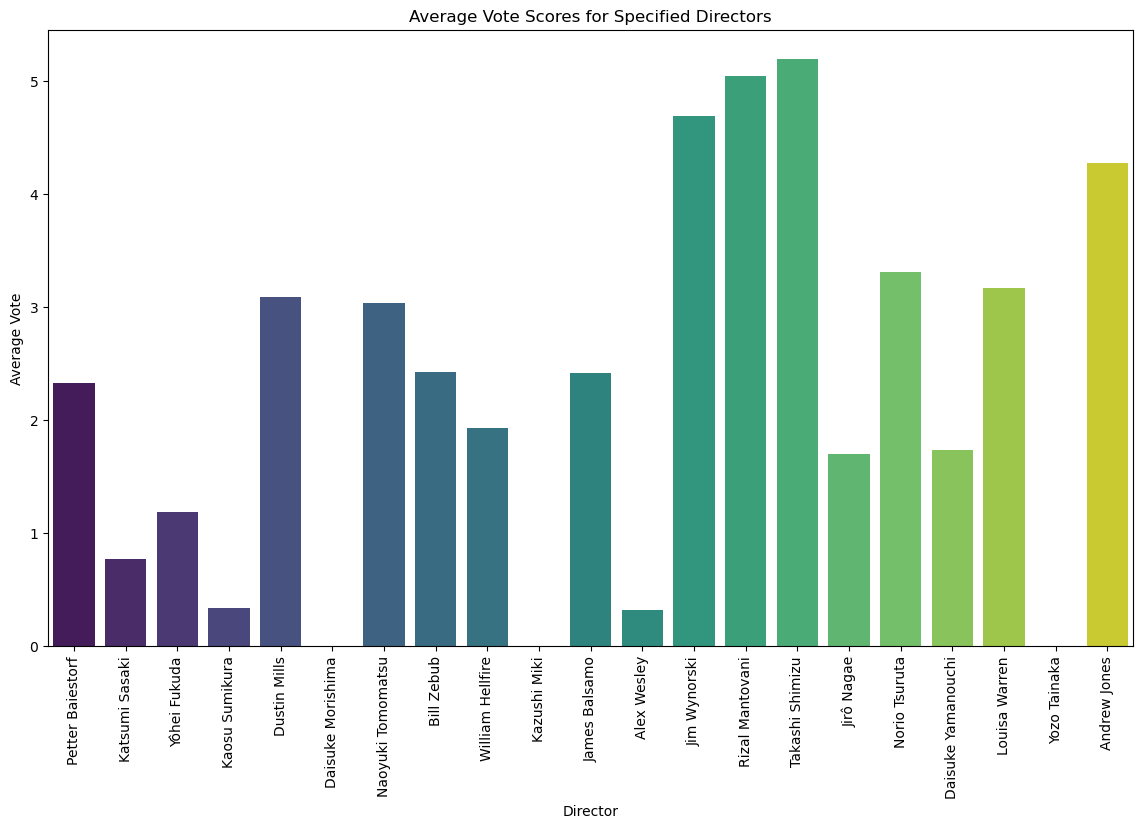

In [13]:
filtered_countries = ['United States of America', 'Canada']
filtered_df = df[(df['Vote Count'] >= 100) & (df['Production Countries'].isin(filtered_countries))]

average_vote = filtered_df.groupby('Director')['Vote Average'].mean().reset_index()

sorted_average_vote = average_vote.sort_values(by='Vote Average', ascending=False)

print("DataFrame with average Vote Average by Director (with more than 100 votes and in specified countries):")
sorted_average_vote

DataFrame with average Vote Average by Director (with more than 100 votes and in specified countries):


,Director,Vote Average
625,Stan Winston,8.000
104,Casper Kelly,7.794
206,Doug Murphy,7.701
409,Kazumi Fukushima,7.664
57,Ariane Louis-Seize,7.599
...,...,...
514,Nick Everhart,3.322
136,Craig Moss,3.311
232,Farhad Mann,3.136
471,Meir Zarchi,3.025


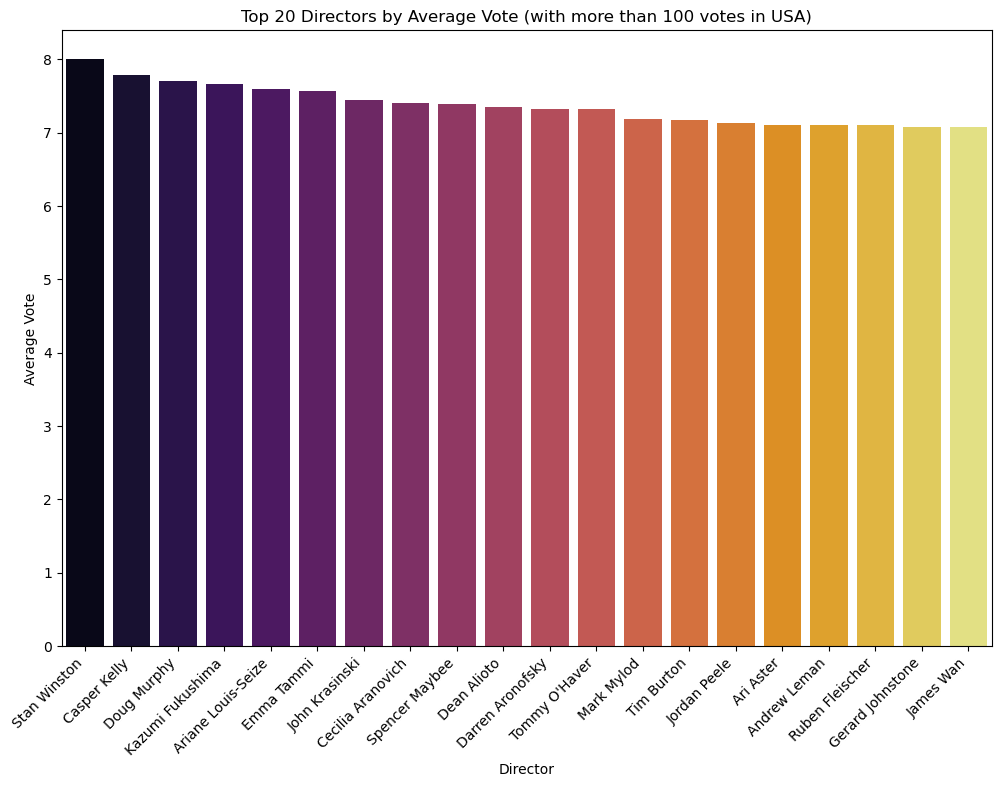

In [11]:
top_20_directors = sorted_average_vote.head(30)

plt.figure(figsize=(12, 8))
sns.barplot(x='Director', y='Vote Average', data=top_20_directors, palette='inferno', hue='Director', dodge=False)

plt.xticks(rotation=45, ha='right')

plt.title('Top 20 Directors by Average Vote (with more than 100 votes in USA)')
plt.xlabel('Director')
plt.ylabel('Average Vote')

plt.show()

In [22]:
directors_with_3_entries = df.groupby('Director').filter(lambda x: len(x) >= 3)

production_countries_filter = ['United States of America', 'Canada', 'United States of America', 'United States of America', 'Canada', 'United States of America']
filtered_df = directors_with_3_entries[directors_with_3_entries['Production Countries'].isin(production_countries_filter)]

average_popularity = filtered_df.groupby('Director')['Popularity'].mean().reset_index()
average_popularity.rename(columns={'Popularity': 'Average Popularity Score'}, inplace=True)
average_popularity = average_popularity.sort_values(by='Average Popularity Score', ascending=False)

average_popularity

,Director,Average Popularity Score
1082,Tim Burton,1032.440000
807,Michael Sarnoski,240.677000
383,Fede Álvarez,233.863667
463,JD Allen,148.463333
727,M. Night Shyamalan,141.742333
...,...,...
374,Ericka Boussarhane,0.036000
158,Carlos Diaz,0.034000
726,Luke Thompson,0.031000
968,Ron DeCaro,0.003000


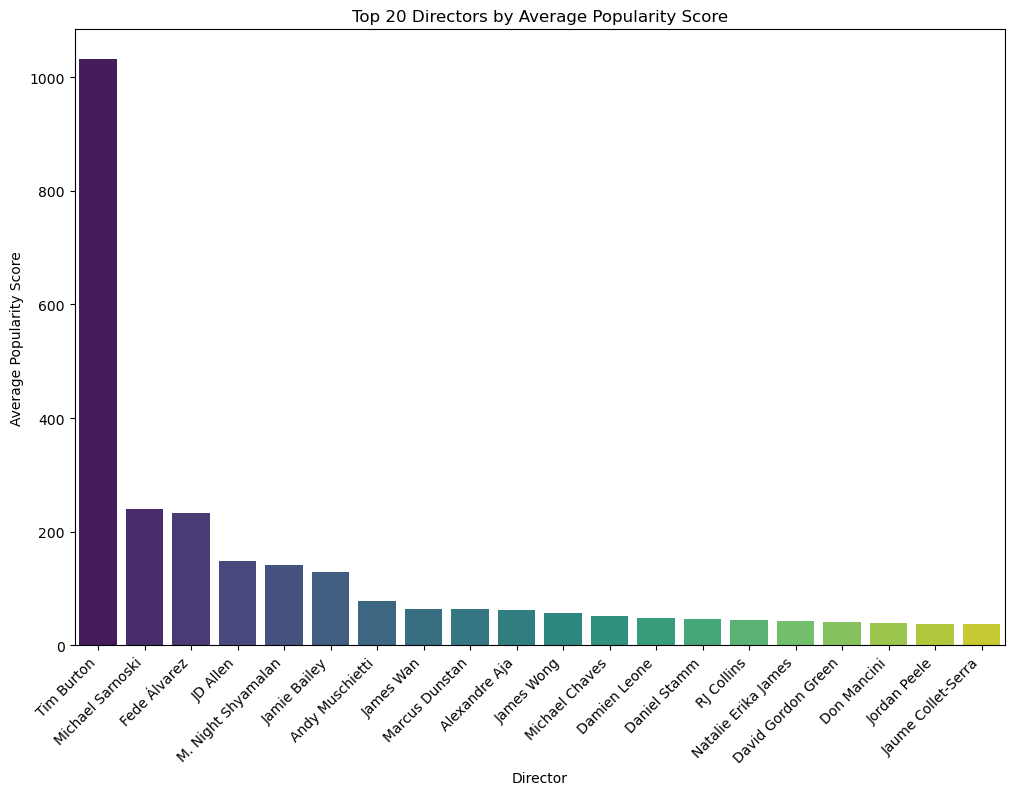

In [23]:
top_20_directors = average_popularity.head(30)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Director', y='Average Popularity Score', data=top_20_directors, palette='viridis', hue='Director', dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 20 Directors by Average Popularity Score')
plt.xlabel('Director')
plt.ylabel('Average Popularity Score')

# Show the plot
plt.show()

In [14]:
sorted_average_vote.to_csv('sorted_average_vote.csv', index=False)

In [17]:
average_popularity.to_csv('average_popularity.csv', index=False)

In [38]:
nu_df = df.groupby('Director')['Budget','Revenue'].reset_index()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [39]:
nu_df = df[['Director', 'Budget', 'Revenue']]
nu_df 

,Director,Budget,Revenue
0,John Fawcett,0,6593579
1,Chris Kentis,130000,54700000
2,Danny Boyle,8000000,85700000
3,James Wan,1200000,103911669
4,Darren Lynn Bousman,10000000,164876498
...,...,...,...
37060,Luis Eduardo de Souza,0,0
37061,NaN,100,0
37062,NaN,20,0
37063,NaN,40,0


In [40]:
nu_no_nan = nu_df.dropna()
nu_no_nan 

,Director,Budget,Revenue
0,John Fawcett,0,6593579
1,Chris Kentis,130000,54700000
2,Danny Boyle,8000000,85700000
3,James Wan,1200000,103911669
4,Darren Lynn Bousman,10000000,164876498
...,...,...,...
37056,Chrysan Martin,0,0
37057,Noah Bosch,150,0
37058,Christopher Matthew Spencer,0,0
37059,Rushabh Thanki,0,0


In [41]:
nu_no_zeros = nu_no_nan[(nu_no_nan['Budget'] != 0) & (nu_no_nan['Revenue'] != 0)]

In [53]:
nu_no_zero['Director' == 'Tim Burton' ]

NameError: name 'nu_no_zero' is not defined

In [43]:
nu_no_zeros['ROI'] = nu_no_zeros['Revenue'] - nu_no_zeros['Budget']

C:\Users\Sahan\AppData\Local\Temp\ipykernel_6332\1945341236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nu_no_zeros['ROI'] = nu_no_zeros['Revenue'] - nu_no_zeros['Budget']


In [44]:
nu_no_zeros.loc[:, 'ROI'] = nu_no_zeros['Revenue'] - nu_no_zeros['Budget']

In [45]:
nu_no_zeros

,Director,Budget,Revenue,ROI
1,Chris Kentis,130000,54700000,54570000
2,Danny Boyle,8000000,85700000,77700000
3,James Wan,1200000,103911669,102711669
4,Darren Lynn Bousman,10000000,164876498,154876498
5,Darren Lynn Bousman,4000000,147748505,143748505
...,...,...,...,...
36871,Alex Magaña,1000,1000,0
36955,Oscar Trajcevski,13,1000,987
36971,Jake Cree,2394383,4,-2394379
36979,Eduardo Lourenço,20,20,0


In [47]:
cash_cow = nu_no_zeros.groupby('Director')['ROI'].mean().reset_index()
cash_cow = cash_cow.sort_values(by='ROI', ascending=False).reset_index(drop=True)

cash_cow

,Director,ROI
0,Andy Muschietti,3.978736e+08
1,Jon Turteltaub,3.805173e+08
2,Marc Forster,3.318650e+08
3,David F. Sandberg,2.915922e+08
4,Alex Kurtzman,2.842316e+08
...,...,...
815,Oliver Hirschbiegel,-3.982944e+07
816,John Bruno,-4.430000e+07
817,Jonathan Demme,-5.710000e+07
818,Walter Hill,-7.517192e+07


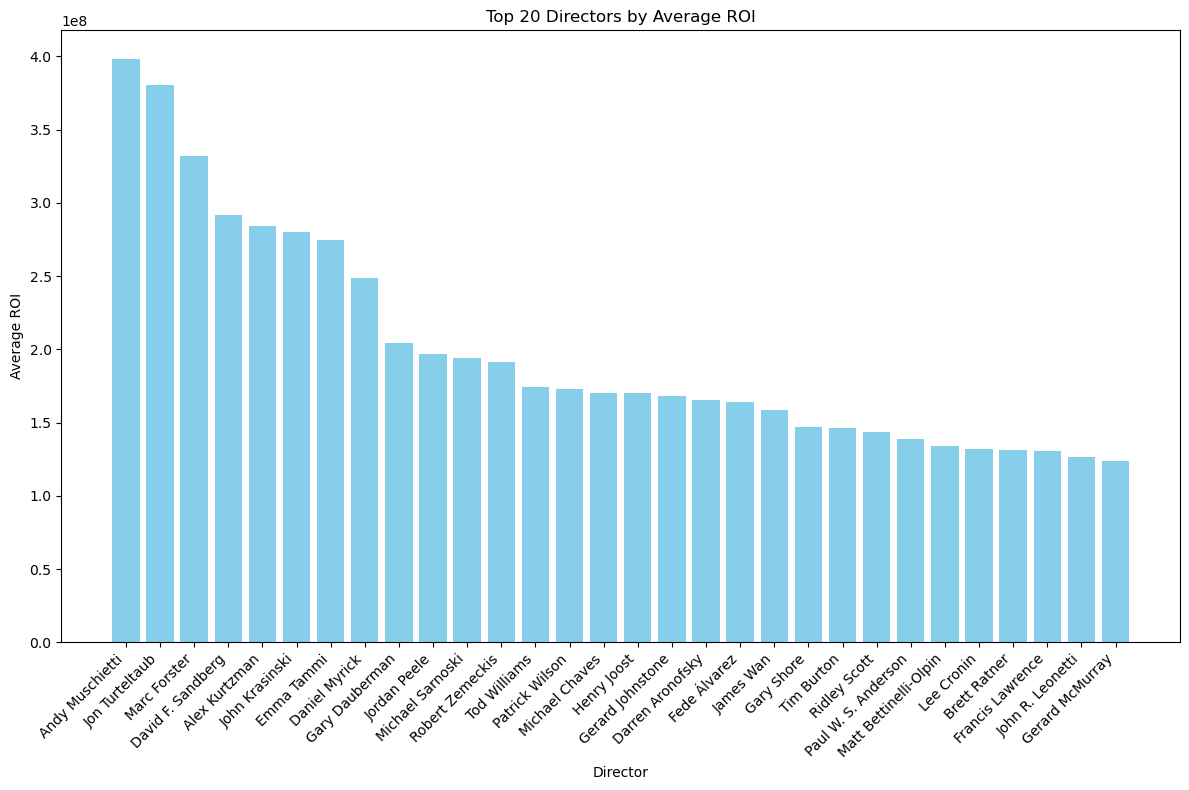

In [51]:
top_20_directors = cash_cow.head(30)
plt.figure(figsize=(12, 8))
plt.bar(top_20_directors['Director'], top_20_directors['ROI'], color='skyblue')
plt.title('Top 20 Directors by Average ROI')
plt.xlabel('Director')
plt.ylabel('Average ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()